# Import Libraries
- Numpy and Pandas for data processing
- Beautiful Soup for removing HTML tags (if there are in the text)
- NLTK and re for removing non-alphabetic characters and removing stopwords.
- Scikit-Learn to get T-Distributed Sctochastic Neighbour Embedding algo and create a Random Forest for Sentiment Analysis and Classification
- Gensim for the Word2Vec
- Matplotlib and Seaborn for visualization
- Multiprocessing to get the core count for parallel tasks (like Word2Vec)

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup 
import re

from nltk.corpus import stopwords
import nltk.data

from gensim.models import word2vec

import logging

import sklearn.manifold

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import multiprocessing

from sklearn.ensemble import RandomForestClassifier

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Dataset Import
We will be working on IMDB Sentiment Analysis Dataset - https://www.kaggle.com/datasets/varun08/imdb-dataset?select=testData.tsv. The dataset contains sentiments labelling for IMDB reviews on movies.

In [3]:
# Read data from files
train = pd.read_csv("dataset/imdb-sentiment-analysis/labeledTrainData.tsv", header=0,\
                    delimiter="\t", quoting=3)

test = pd.read_csv("dataset/imdb-sentiment-analysis/testData.tsv",header=0,\
                    delimiter="\t", quoting=3)

In [4]:
train.head(10)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [5]:
test.head(10)

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."
5,"""2913_8""","""...as valuable as King Tut's tomb! (OK, maybe..."
6,"""4396_1""","""This has to be one of the biggest misfires ev..."
7,"""395_2""","""This is one of those movies I watched, and wo..."
8,"""10616_1""","""The worst movie i've seen in years (and i've ..."
9,"""9074_9""","""Five medical students (Kevin Bacon, David Lab..."


# Cleaning Data
- The reviews consists of sentences. But we need words instead of sentences because this is how the Gensim Word2Vec model desires its input.
- In order to get words, we break down multiple sentences into single sentence, and then consequently into words.
- This is done through these two methods `review_wordlist` and `review_sentences`.
- Both the methods utilize the tokenizer from Natural Language Toolkit (NLTK) library.

In [6]:
def clean_reviews():
    # This function converts a text to a sequence of words.
    def review_wordlist(review, remove_stopwords=False):
        # Remove html tags
        review_text = BeautifulSoup(review).get_text()
        # Remove non-letter.
        review_text = re.sub("[^a-zA-Z]"," ",review_text)
        # Converting to lower case and splitting
        words = review_text.lower().split()
        # Optionally remove stopwords (Experimenting with this part)
        if remove_stopwords:
            stops = set(stopwords.words("english"))     
            words = [w for w in words if not w in stops]
        
        return(words)
    # word2vec expects a list of lists.
    # Using punkt tokenizer for better splitting of a paragraph into sentences.
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    # Review into sentences
    def review_sentences(review, tokenizer, remove_stopwords=False):
        # Using nltk tokenizer, get multiple sentences from a group of sentences.
        raw_sentences = tokenizer.tokenize(review.strip())
        sentences = []
        for raw_sentence in raw_sentences:
            if len(raw_sentence)>0:
                sentences.append(review_wordlist(raw_sentence,\
                                                remove_stopwords))
        return sentences
    sentences = []
    for review in train["review"]:
        sentences += review_sentences(review, tokenizer)
    return sentences
    

In [7]:
sentences = clean_reviews()

/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/bs4/__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [64]:
sentences

[['with',
  'all',
  'this',
  'stuff',
  'going',
  'down',
  'at',
  'the',
  'moment',
  'with',
  'mj',
  'i',
  've',
  'started',
  'listening',
  'to',
  'his',
  'music',
  'watching',
  'the',
  'odd',
  'documentary',
  'here',
  'and',
  'there',
  'watched',
  'the',
  'wiz',
  'and',
  'watched',
  'moonwalker',
  'again'],
 ['maybe',
  'i',
  'just',
  'want',
  'to',
  'get',
  'a',
  'certain',
  'insight',
  'into',
  'this',
  'guy',
  'who',
  'i',
  'thought',
  'was',
  'really',
  'cool',
  'in',
  'the',
  'eighties',
  'just',
  'to',
  'maybe',
  'make',
  'up',
  'my',
  'mind',
  'whether',
  'he',
  'is',
  'guilty',
  'or',
  'innocent'],
 ['moonwalker',
  'is',
  'part',
  'biography',
  'part',
  'feature',
  'film',
  'which',
  'i',
  'remember',
  'going',
  'to',
  'see',
  'at',
  'the',
  'cinema',
  'when',
  'it',
  'was',
  'originally',
  'released'],
 ['some',
  'of',
  'it',
  'has',
  'subtle',
  'messages',
  'about',
  'mj',
  's',
  'feeli

In [65]:
# Importing the built-in logging module
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [82]:
# Creating the model and setting values for the various parameters
num_features_arr = [300]  # Word vector dimensionality
min_word_count_arr = [20, 40] # Minimum word count
context_arr = [10, 50]        # Context window size
downsampling_arr = [1e-3] # (0.001) Downsample setting for frequent words

In [86]:
def train_and_get_model(num_features, min_word_count, context, downsampling):
    cores = multiprocessing.cpu_count()
    # Initializing the train model
    model = word2vec.Word2Vec(sentences,\
                            workers=cores,\
                            vector_size=num_features,\
                            min_count=min_word_count,\
                            window=context,
                            sample=downsampling)
    # To make the model memory efficient                        
    model.init_sims(replace=True)
    model_name = "{}features_{}minwords_{}context".format(num_features, min_word_count, context)
    model.save(model_name)
    return model


In [87]:
models = []
for feature in num_features_arr:
    for wordcount in min_word_count_arr:
        for context in context_arr:
            for ds in downsampling_arr:
                models.append(train_and_get_model(feature, wordcount, context, ds))

2022-11-04 16:55:50,010 : INFO : collecting all words and their counts
2022-11-04 16:55:50,011 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-04 16:55:50,039 : INFO : PROGRESS: at sentence #10000, processed 225908 words, keeping 17776 word types
2022-11-04 16:55:50,070 : INFO : PROGRESS: at sentence #20000, processed 452097 words, keeping 24953 word types
2022-11-04 16:55:50,099 : INFO : PROGRESS: at sentence #30000, processed 671983 words, keeping 30044 word types
2022-11-04 16:55:50,130 : INFO : PROGRESS: at sentence #40000, processed 898756 words, keeping 34358 word types
2022-11-04 16:55:50,165 : INFO : PROGRESS: at sentence #50000, processed 1122099 words, keeping 37824 word types
2022-11-04 16:55:50,197 : INFO : PROGRESS: at sentence #60000, processed 1341945 words, keeping 40782 word types
2022-11-04 16:55:50,228 : INFO : PROGRESS: at sentence #70000, processed 1566791 words, keeping 43383 word types
2022-11-04 16:55:50,257 : INFO : PROGRESS: 

In [8]:
models = []
models.append(word2vec.Word2Vec.load('models/300features_20minwords_10context'))
models.append(word2vec.Word2Vec.load('models/300features_20minwords_50context'))
models.append(word2vec.Word2Vec.load('models/300features_40minwords_10context'))
models.append(word2vec.Word2Vec.load('models/300features_20minwords_50context'))

In [9]:
def visualize_model(model, idx):
    word_list = model.wv.index_to_key
    count = len(word_list)
    num_features = model.wv.get_vector(word_list[0]).shape[0]
    word_vector_matrix = np.ndarray(shape=(count, num_features), dtype='float64')
    i = 0
    for word in word_list:
        word_vector_matrix[i] = model.wv.get_vector(word)
        i += 1
    print(word_vector_matrix.shape)
    # Converting the feature matrix into 2d matrix for plotting purposes.
    tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
    word_vector_matrix_2d = tsne.fit_transform(word_vector_matrix)
    points = pd.DataFrame(
        [
            (word, coords[0], coords[1]) 
            for word, coords in [
                (word, word_vector_matrix_2d[word_list.index(word)])
                for word in word_list
            ]
        ],
        columns=["word", "x", "y"]
    )
    sns.set_context("poster")
    sns_plot = points.plot.scatter("x", "y", s=10, figsize=(20, 12))
    fig = sns_plot.get_figure()
    fig.savefig("scatter_{}.png".format(idx))
    return points

def plot_granular_region(points, x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1]) 
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [10]:
wc_idx = [20, 20, 40, 40]
context_idx = [10, 50, 10, 50]

(13153, 300)


/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(13153, 300)


/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(8306, 300)


/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(13153, 300)


/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


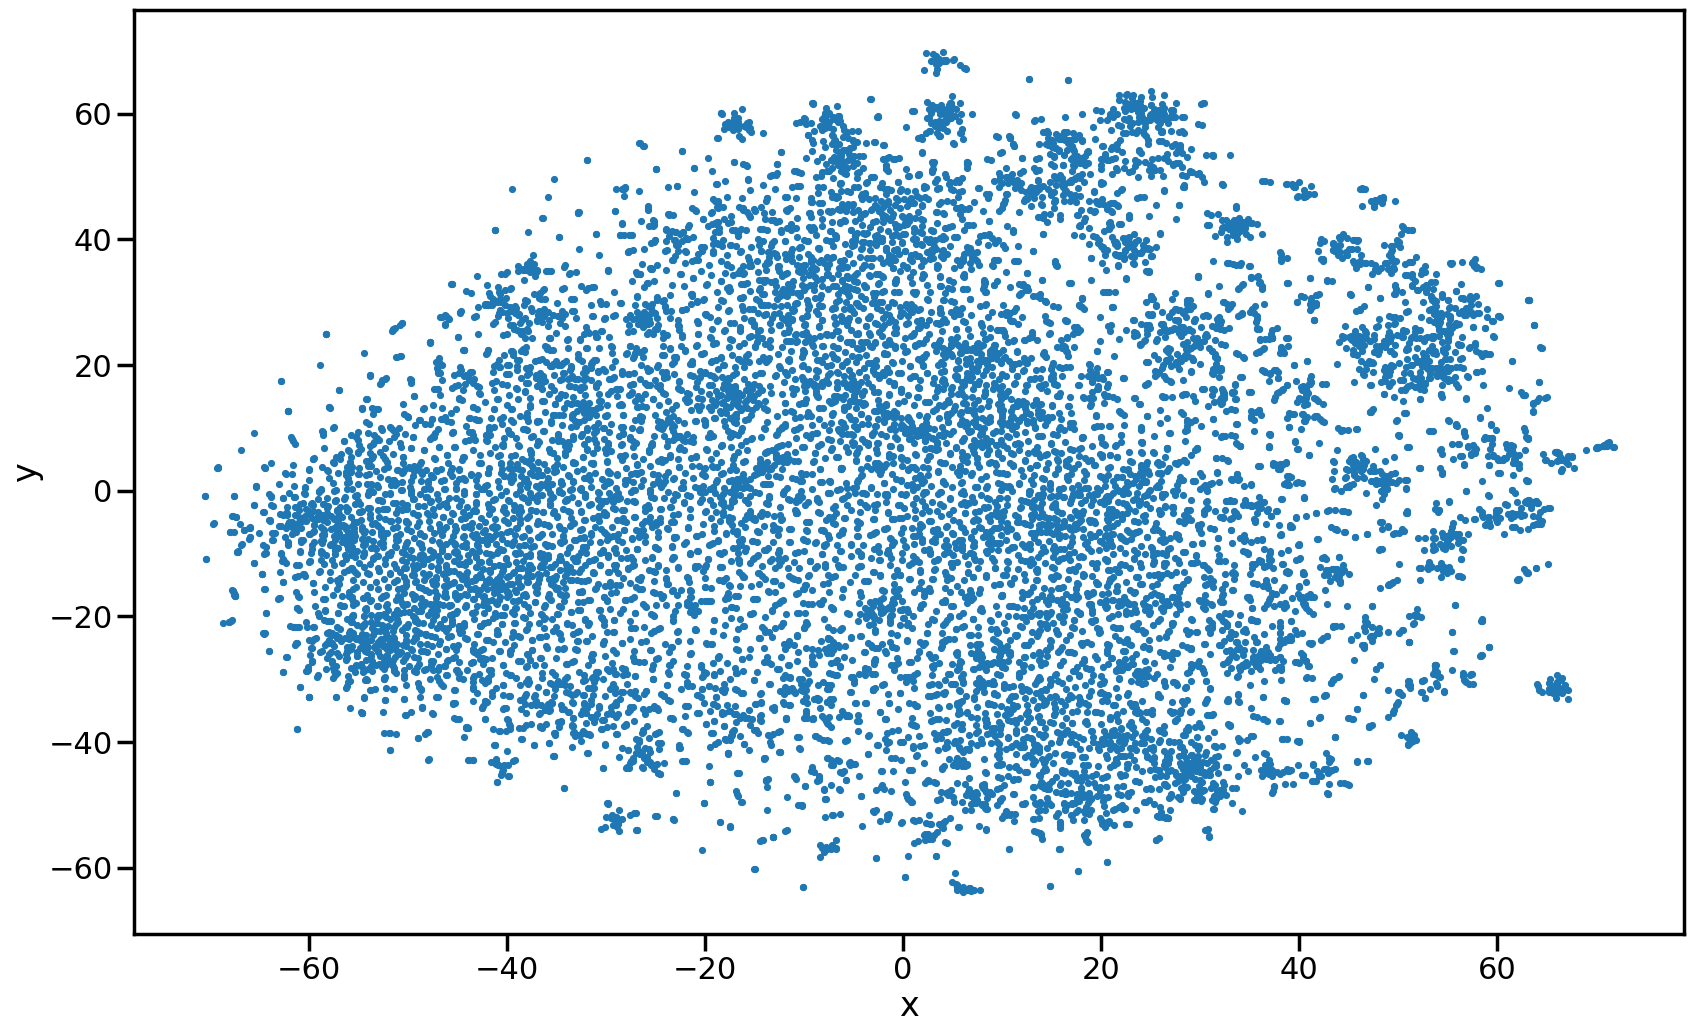

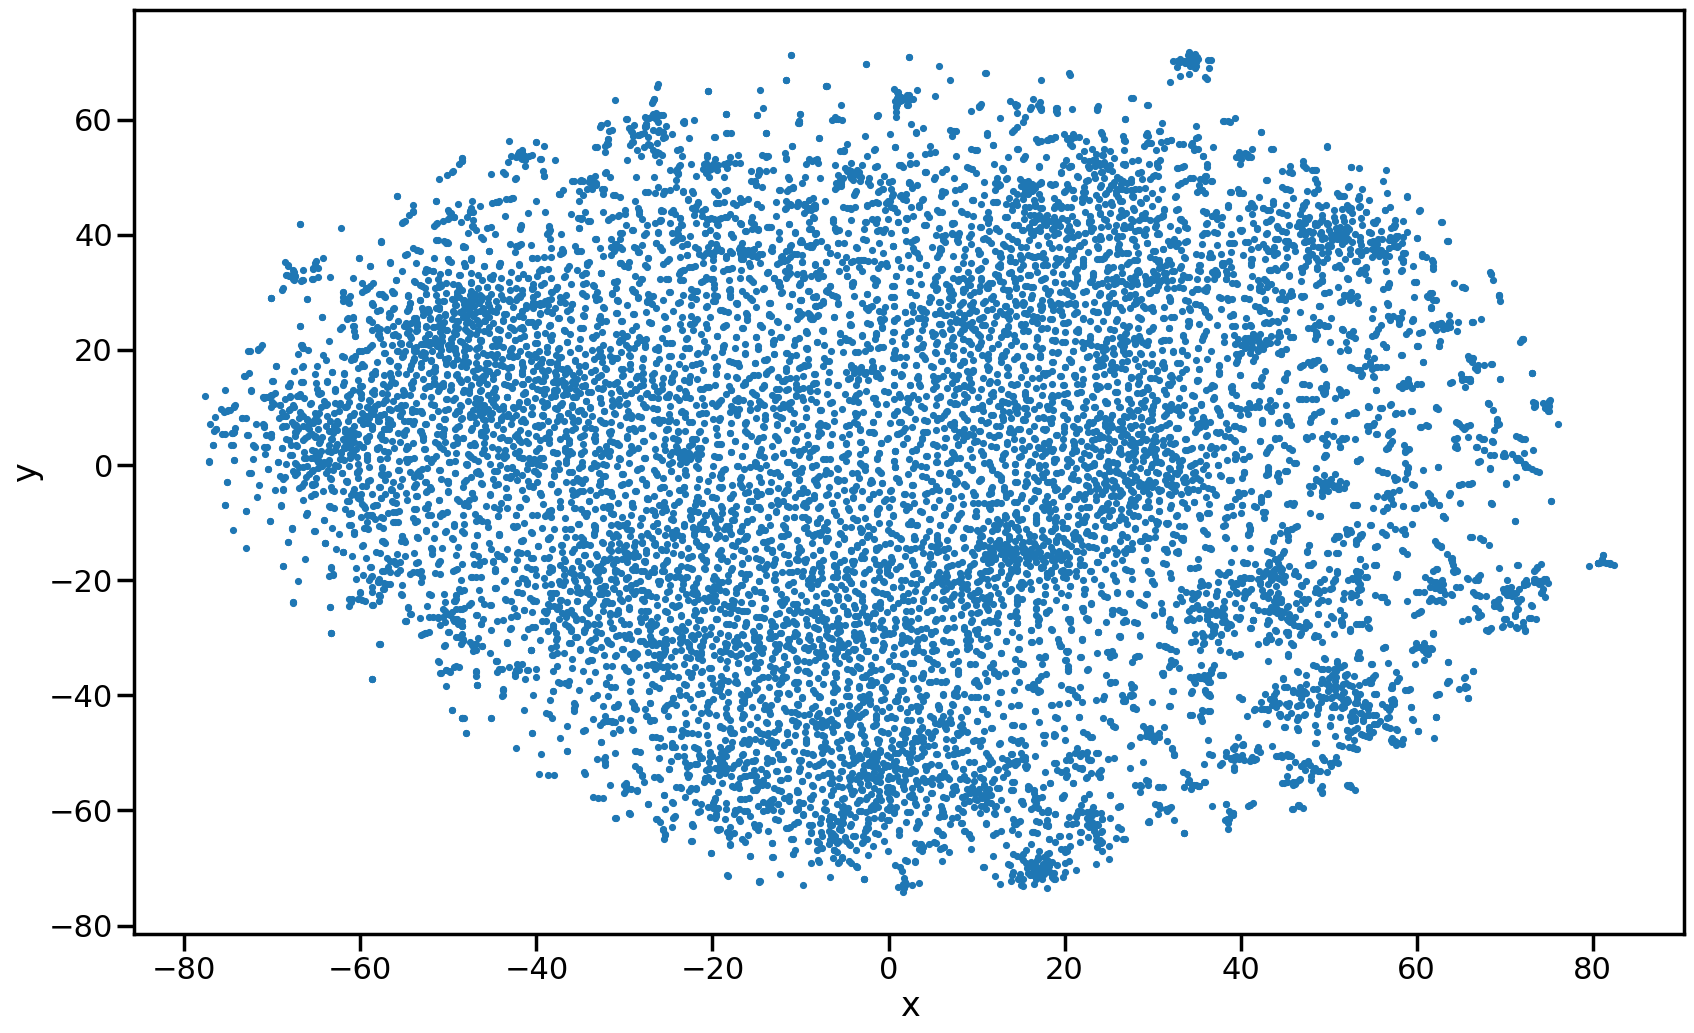

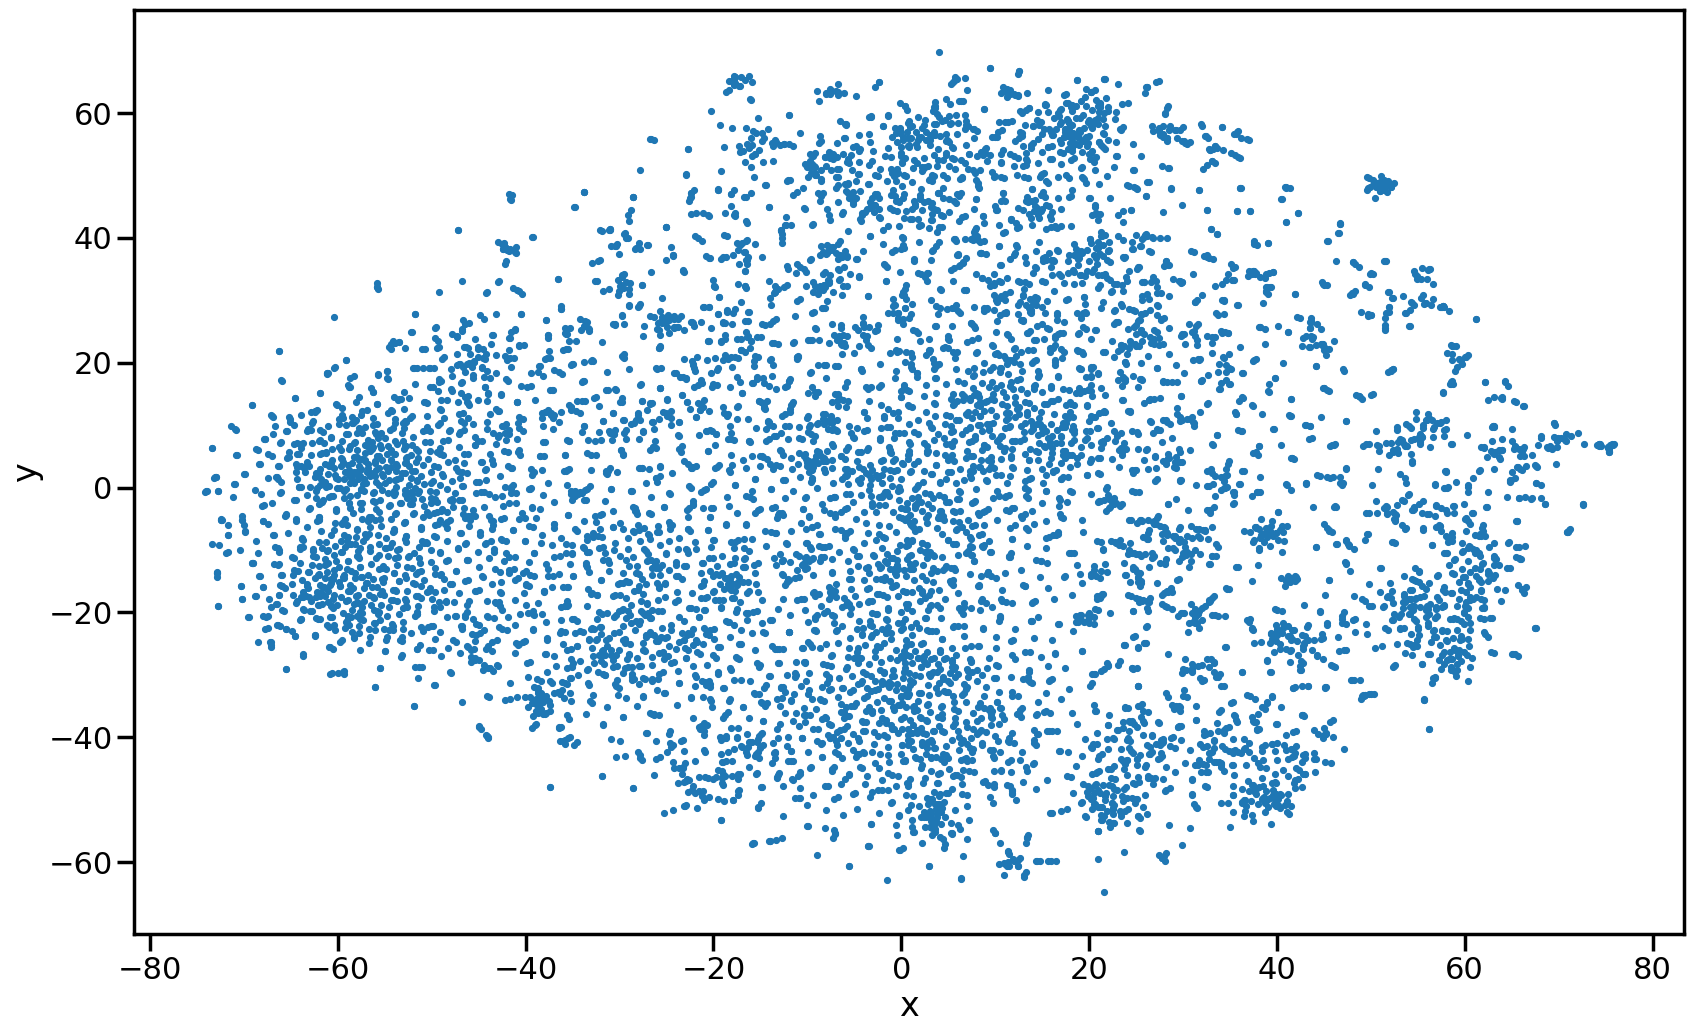

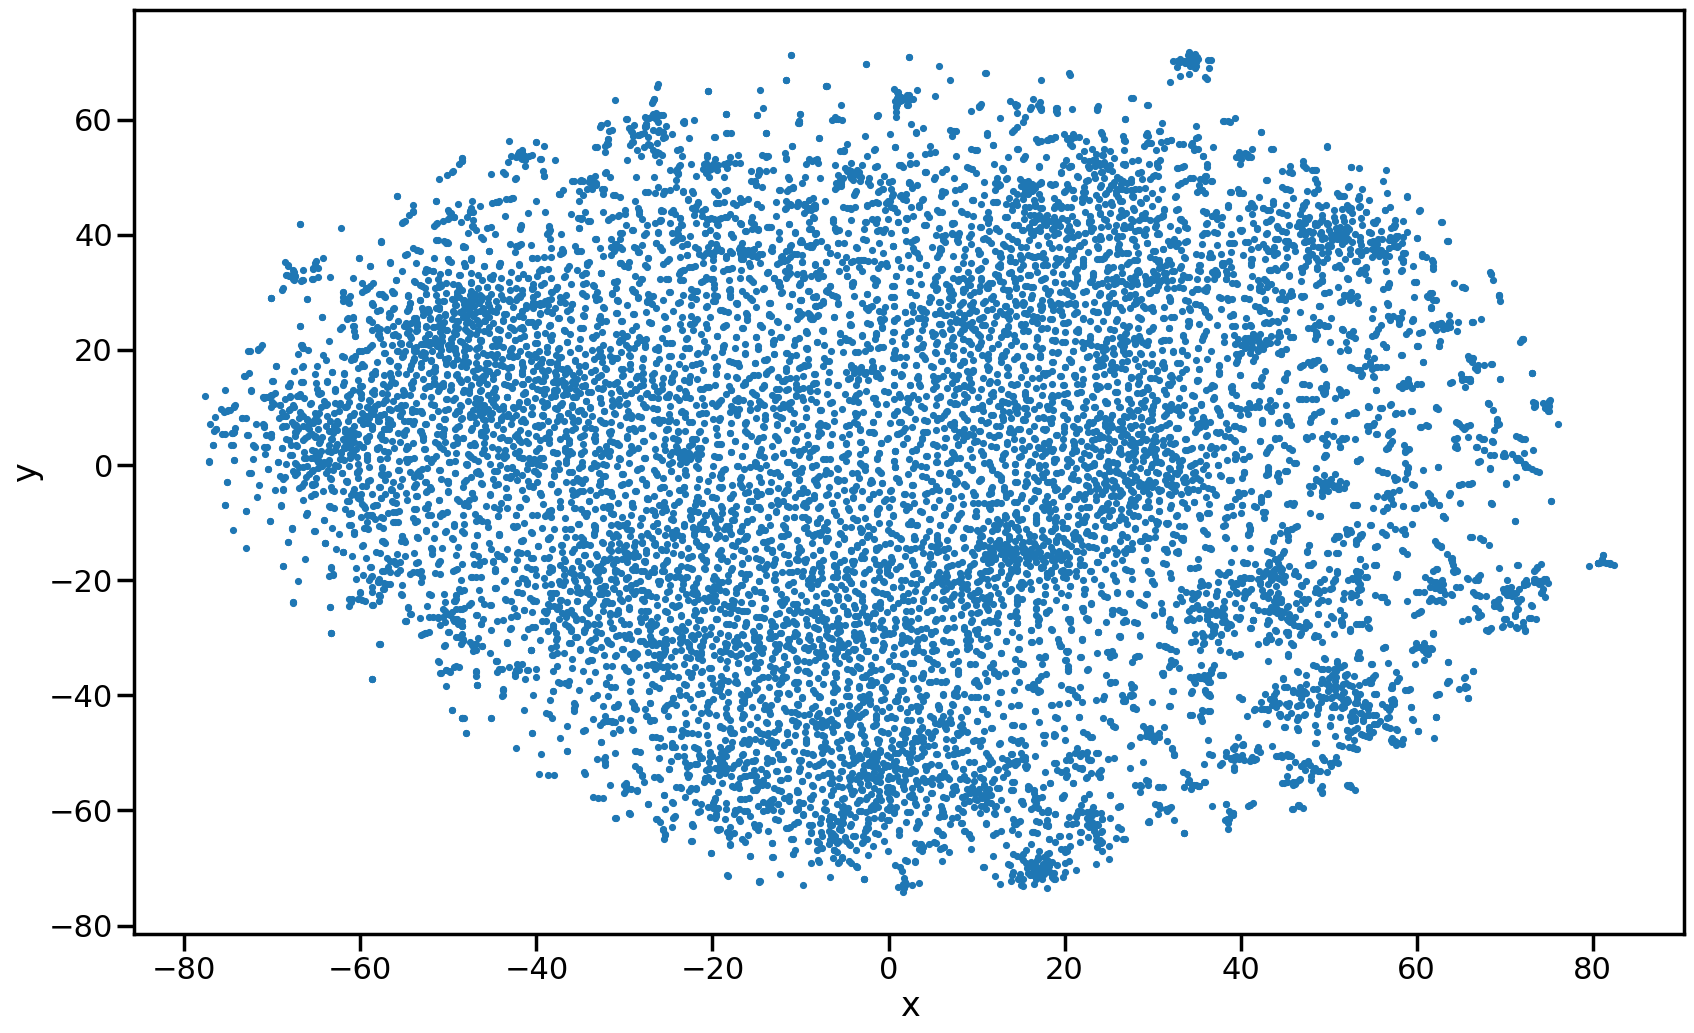

In [11]:
points_all = []
for i, model in enumerate(models):
    points_all.append(visualize_model(model, i))

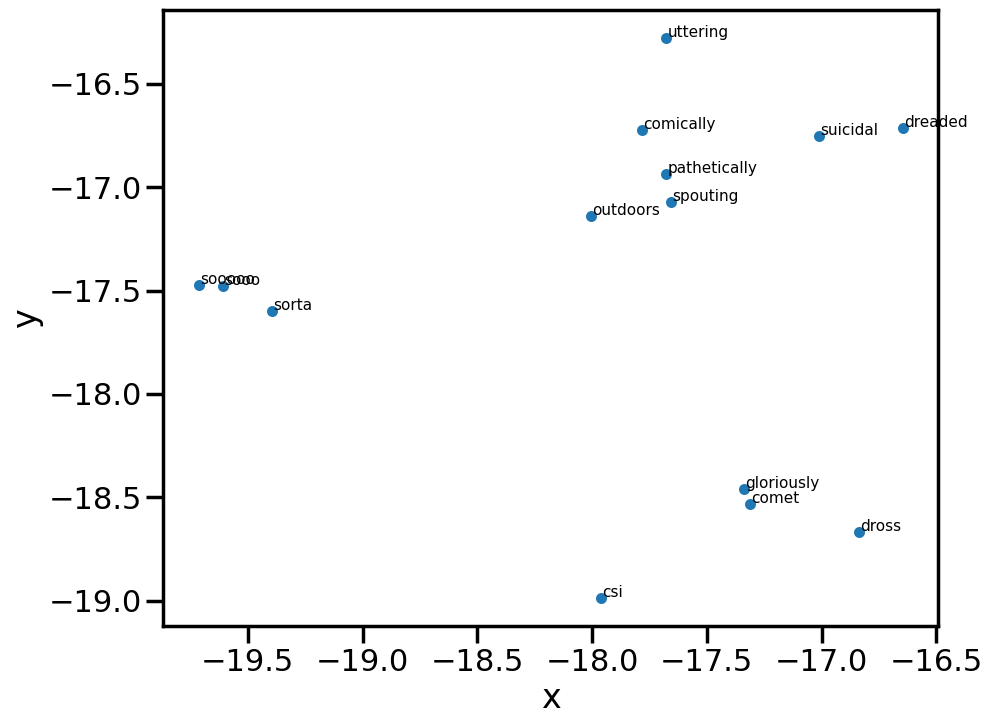

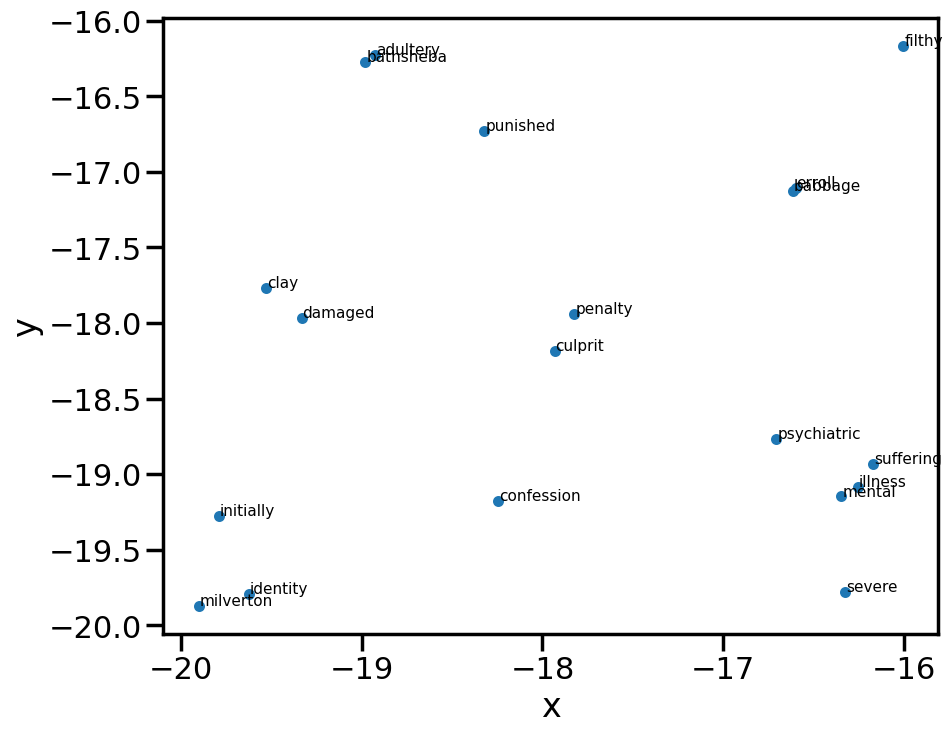

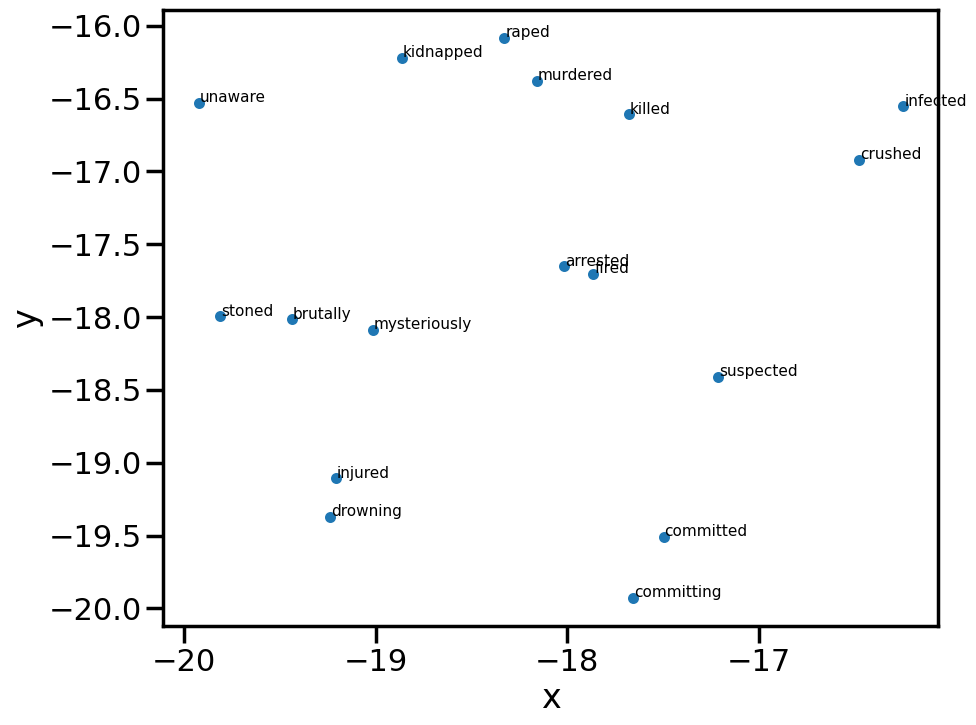

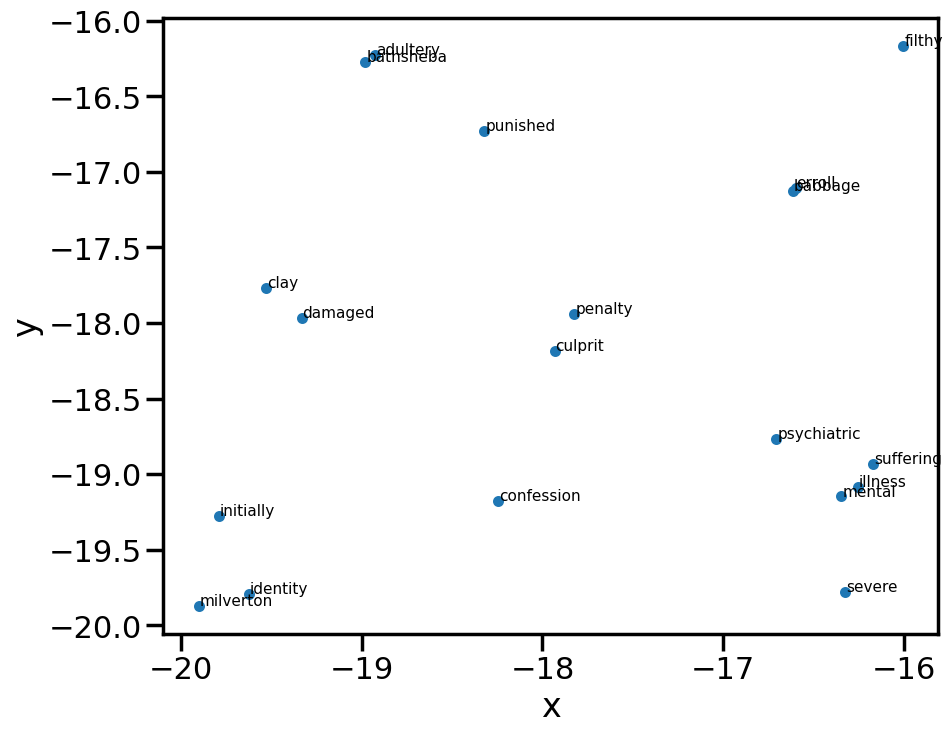

In [13]:
for points in points_all:
    plot_granular_region(points, (-20, -16), (-20, -16))

In [23]:
def print_formatted(kv):
    for k, s in kv:
        print(f'  - {k}: {s:.4f}')
def evaluate_model(model, word_count, context_sz):
    print('>> Model with minimum word count of {} and context size of {}'.format(word_count, context_sz))
    print('- Words similar to "man"')
    print_formatted(model.wv.most_similar("man"))
    print('- Words similar to "awful"')
    print_formatted(model.wv.most_similar("awful"))
    print('- Words similar to "embarrased"')
    print_formatted(model.wv.most_similar("embarrassed"))
    print('- Words similar to "happy"')
    print_formatted(model.wv.most_similar("happy"))
    print('- Words similar to "action"')
    print_formatted(model.wv.most_similar("action"))

In [24]:
k = 0
for model in models:
    evaluate_model(model, wc_idx[k], context_idx[k])
    print("------------------------------")
    k += 1

>> Model with minimum word count of 20 and context size of 10
- Words similar to "man"
  - woman: 0.6269
  - boy: 0.6094
  - doctor: 0.5976
  - soldier: 0.5814
  - lady: 0.5709
  - person: 0.5685
  - scientist: 0.5589
  - guy: 0.5422
  - journalist: 0.5410
  - cop: 0.5390
- Words similar to "awful"
  - terrible: 0.8230
  - horrible: 0.8029
  - dreadful: 0.7437
  - laughable: 0.6999
  - atrocious: 0.6990
  - horrendous: 0.6948
  - lame: 0.6779
  - pathetic: 0.6740
  - abysmal: 0.6733
  - ridiculous: 0.6660
- Words similar to "embarrased"
  - pleased: 0.6396
  - ashamed: 0.6032
  - shocked: 0.6024
  - sorry: 0.5790
  - delighted: 0.5773
  - disgusted: 0.5657
  - thrilled: 0.5652
  - amused: 0.5594
  - warned: 0.5373
  - surprised: 0.5371
- Words similar to "happy"
  - afraid: 0.4945
  - prepared: 0.4944
  - ready: 0.4899
  - satisfied: 0.4846
  - lucky: 0.4693
  - disappointed: 0.4605
  - wanting: 0.4384
  - pleased: 0.4328
  - sweet: 0.4303
  - sad: 0.4237
- Words similar to "action"
  

In [25]:
forests = []
def build_and_predict_sentiment(model):
    # Function to average all word vectors in a paragraph
    def featureVecMethod(words, model, num_features):
        # Pre-initialising empty numpy array for speed
        featureVec = np.zeros(num_features,dtype="float32")
        nwords = 0
        
        #Converting Index2Word which is a list to a set for better speed in the execution.
        index2word_set = set(model.wv.index_to_key)
        
        for word in  words:
            if word in index2word_set:
                nwords = nwords + 1
                featureVec = np.add(featureVec,model.wv.get_vector(word))
        
        # Dividing the result by number of words to get average
        featureVec = np.divide(featureVec, nwords)
        return featureVec
    # Function for calculating the average feature vector
    def getAvgFeatureVecs(reviews, model, num_features):
        counter = 0
        reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
        for review in reviews:
            reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
            counter = counter+1
            
        return reviewFeatureVecs
    
    # This function converts a text to a sequence of words.
    def review_wordlist(review, remove_stopwords=False):
        # 1. Removing html tags
        review_text = BeautifulSoup(review).get_text()
        # 2. Removing non-letter.
        review_text = re.sub("[^a-zA-Z]"," ",review_text)
        # 3. Converting to lower case and splitting
        words = review_text.lower().split()
        # 4. Optionally remove stopwords
        if remove_stopwords:
            stops = set(stopwords.words("english"))     
            words = [w for w in words if not w in stops]
        
        return(words)

    word_list = model.wv.index_to_key
    num_features = model.wv.get_vector(word_list[0]).shape[0]
    clean_train_reviews = []
    for review in train['review']:
        clean_train_reviews.append(review_wordlist(review, remove_stopwords=True))
        
    trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

    clean_test_reviews = []
    for review in test["review"]:
        clean_test_reviews.append(review_wordlist(review,remove_stopwords=True))
        
    testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)

    forest = RandomForestClassifier(n_estimators = 100)
    forest = forest.fit(trainDataVecs, train["sentiment"])
    forests.append(forest)

    result = forest.predict(testDataVecs)
    output = pd.DataFrame(data={"id":test["id"], "sentiment":result, "sentence": test["review"]})
    return output
    

In [26]:
outputs = []
for model in models:
    outputs.append(build_and_predict_sentiment(model))
k = 0
for output in outputs:
    print('>> Model with minimum word count of {} and context size of {}'.format(wc_idx[k], context_idx[k]))
    print(output.head(10))
    k += 1

/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/home/abhishek/anaconda3/envs/cs6220_3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass t

>> Model with minimum word count of 20 and context size of 10
           id  sentiment                                           sentence
0  "12311_10"          1  "Naturally in a film who's main themes are of ...
1    "8348_2"          0  "This movie is a disaster within a disaster fi...
2    "5828_4"          1  "All in all, this is a movie for kids. We saw ...
3    "7186_2"          0  "Afraid of the Dark left me with the impressio...
4   "12128_7"          1  "A very accurate depiction of small time mob l...
5    "2913_8"          1  "...as valuable as King Tut's tomb! (OK, maybe...
6    "4396_1"          0  "This has to be one of the biggest misfires ev...
7     "395_2"          0  "This is one of those movies I watched, and wo...
8   "10616_1"          0  "The worst movie i've seen in years (and i've ...
9    "9074_9"          1  "Five medical students (Kevin Bacon, David Lab...
>> Model with minimum word count of 20 and context size of 50
           id  sentiment                

[Text(0.4859056678296895, 0.9833333333333333, 'X[137] <= -0.007\ngini = 0.5\nsamples = 15765\nvalue = [12537, 12463]'),
 Text(0.23182647883118526, 0.95, 'X[256] <= 0.015\ngini = 0.439\nsamples = 7469\nvalue = [7993, 3857]'),
 Text(0.1048532679671687, 0.9166666666666666, 'X[214] <= 0.009\ngini = 0.378\nsamples = 5673\nvalue = [6744, 2286]'),
 Text(0.04424540867960471, 0.8833333333333333, 'X[157] <= -0.009\ngini = 0.5\nsamples = 1293\nvalue = [1045, 1016]'),
 Text(0.01721931182283605, 0.85, 'X[63] <= 0.005\ngini = 0.435\nsamples = 511\nvalue = [259, 550]'),
 Text(0.008899869032027623, 0.8166666666666667, 'X[125] <= -0.012\ngini = 0.487\nsamples = 172\nvalue = [157, 114]'),
 Text(0.0032741993094416, 0.7833333333333333, 'X[221] <= 0.001\ngini = 0.375\nsamples = 82\nvalue = [102, 34]'),
 Text(0.0019049886891296583, 0.75, 'X[133] <= 0.026\ngini = 0.221\nsamples = 52\nvalue = [83, 12]'),
 Text(0.0014287415168472437, 0.7166666666666667, 'X[129] <= -0.025\ngini = 0.126\nsamples = 48\nvalue = [8

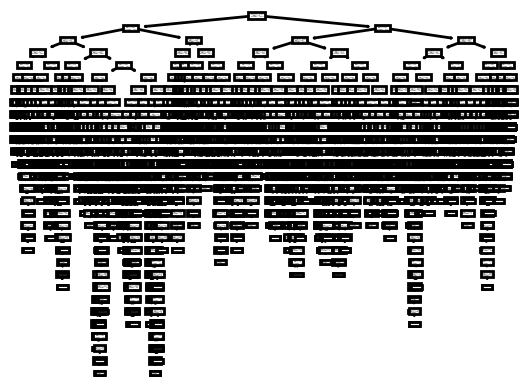

In [27]:
from sklearn.tree import plot_tree
plot_tree(forests[0].estimators_[0])